In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 14.4 MB/s 
     |████████████████████████████████| 9.9 MB 58.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D


In [ ]:
df = pd.read_csv('accidental-deaths-in-usa-monthly.csv')

In [ ]:
df.head(10)

,Month,Accidental deaths
0,1973-01,9007
1,1973-02,8106
2,1973-03,8928
3,1973-04,9137
4,1973-05,10017
5,1973-06,10826
6,1973-07,11317
7,1973-08,10744
8,1973-09,9713
9,1973-10,9938


In [ ]:
df.reset_index()

,index,Month,Accidental deaths
0,0,1973-01,9007
1,1,1973-02,8106
2,2,1973-03,8928
3,3,1973-04,9137
4,4,1973-05,10017
...,...,...,...
67,67,1978-08,9827
68,68,1978-09,9110
69,69,1978-10,9070
70,70,1978-11,8633


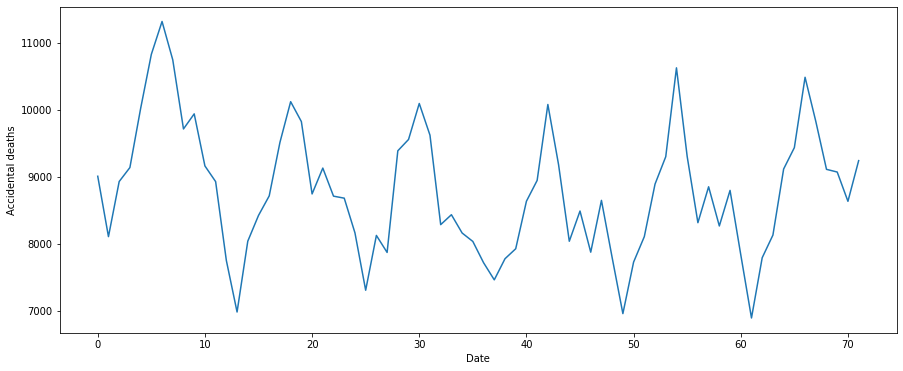

In [ ]:
df["Accidental deaths"].plot(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("Accidental deaths")
plt.show()

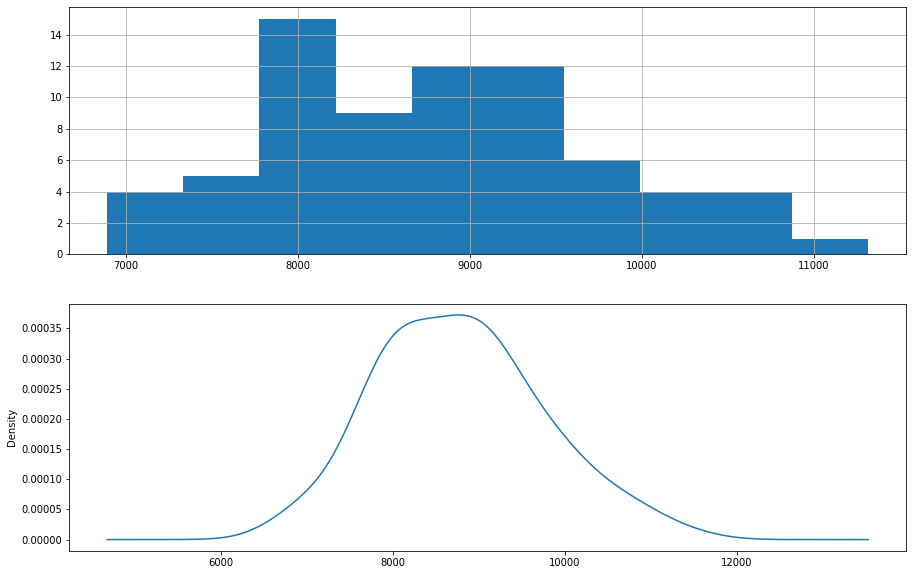

In [ ]:
plt.figure(1, figsize=(15,10))
plt.subplot(211)
df["Accidental deaths"].hist()
plt.subplot(212)
df["Accidental deaths"].plot(kind='kde')
plt.show()

In [ ]:
def evaluation(y_true, y_pred, model):
    met = {}
    met['Model'] = model
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    met['MSE'] = metrics.mean_squared_error(y_true, y_pred)
    met['MAE'] = metrics.mean_absolute_error(y_true, y_pred)
    met['RMSE'] = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    met['MAPE'] = mean_absolute_percentage_error(y_true, y_pred)
    met['R2'] = metrics.r2_score(y_true, y_pred)

    data = pd.DataFrame(met, index=[0])
    # print(data)
    return data

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='aic')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value','No of Lags','No of Obsv'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
Augmented_Dickey_Fuller_Test_func(df['Accidental deaths'],'Accidental deaths')

Results of Dickey-Fuller Test for column: Accidental deaths
Test Statistics         -2.555798
p-value                  0.102481
No of Lags              12.000000
No of Obsv              59.000000
Critical Value (1%)     -3.546395
Critical Value (5%)     -2.911939
Critical Value (10%)    -2.593652
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
X = df[['Accidental deaths']]
train, test = X[0:-30], X[-30:]

In [ ]:
stepwise_model = auto_arima(train, start_p=1, start_q=1,
    max_p=7, max_q=7, seasonal=False,
    d=1, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=658.308, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=654.322, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=656.305, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=656.310, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=652.322, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.316 seconds


In [ ]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   42
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -325.161
Date:                Wed, 21 Dec 2022   AIC                            652.322
Time:                        20:05:26   BIC                            654.036
Sample:                             0   HQIC                           652.946
                                 - 42                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.527e+05   1.24e+05      3.641      0.000    2.09e+05    6.96e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.46   Prob(JB):                         0.65
Heteroskedasticity (H):               0.67   Skew:                            -0.05
Prob(H) (two-sided):                  0.46   Kurtosis:                         2.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast, conf_int = stepwise_model.predict(n_periods=30, return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['close_pred'])

In [ ]:
df_conf = pd.DataFrame(conf_int, columns= ['Upper_bound','Lower_bound'])
df_conf["new_index"] = range(42, 72)
df_conf = df_conf.set_index("new_index")

In [ ]:
arima = evaluation(test, forecast, 'ARIMA')

In [ ]:
forecast["new_index"] = range(42, 72)
forecast = forecast.set_index("new_index")

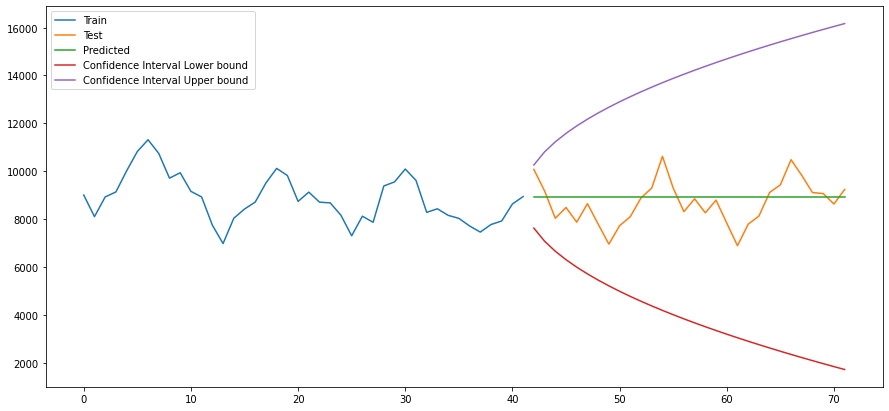

In [ ]:
plt.rcParams["figure.figsize"] = [15,7]
plt.plot(train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(forecast, label='Predicted ')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Lower bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Upper bound ')
plt.legend(loc='best')
plt.show()

In [ ]:
df = pd.read_csv(filepath)
df.rename(columns = {'Accidental deaths in USA: monthly, 1973 ? 1978':'Accidental deaths'}, inplace = True)

In [ ]:
df.head()

,Month,Accidental deaths
0,1973-01,9007
1,1973-02,8106
2,1973-03,8928
3,1973-04,9137
4,1973-05,10017


In [ ]:
df.shape

(72, 2)

In [ ]:
data = df['Accidental deaths']

In [ ]:
def getXY(sequence, steps):
    X, Y = list(), list()
    for start in range(len(sequence)):
        end = start + steps
        if end > len(sequence) - 1:
            break
        
        X.append(sequence[start:end])
        Y.append(sequence[end])
    
    return np.array(X), np.array(Y)

In [ ]:
steps = 3
X, Y = getXY(data, steps)
print(X[:5])
print(X[:5])

[[ 9007  8106  8928]
 [ 8106  8928  9137]
 [ 8928  9137 10017]
 [ 9137 10017 10826]
 [10017 10826 11317]]
[[ 9007  8106  8928]
 [ 8106  8928  9137]
 [ 8928  9137 10017]
 [ 9137 10017 10826]
 [10017 10826 11317]]


In [ ]:
features = 1
X = X.reshape(X.shape[0], X.shape[1], features)

In [ ]:
split = -30
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

In [ ]:
model = Sequential([
        Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps, features)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(500, activation='relu'),
        Dense(100, activation='relu'),
        Dense(500, activation='relu'),
        Dense(1)
    ])

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 500)               32500     
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dense_2 (Dense)             (None, 500)               50500     
                                                        

In [ ]:
h = model.fit(X_train, Y_train, epochs=1000, verbose=0)

In [ ]:
Y_pred = model.predict(X_test)

1/1 [==============================] - 0s 113ms/step


In [ ]:
cnn = evaluation(Y_test, Y_pred, 'CNN')

In [ ]:
pred = pd.DataFrame(Y_pred, columns=['Y_pred'])
pred['index'] = range(42,72)
pred = pred.set_index('index')

In [ ]:
test = pd.DataFrame(Y_test, columns=['Y_test'])
test['index'] = range(42,72)
test = test.set_index('index')

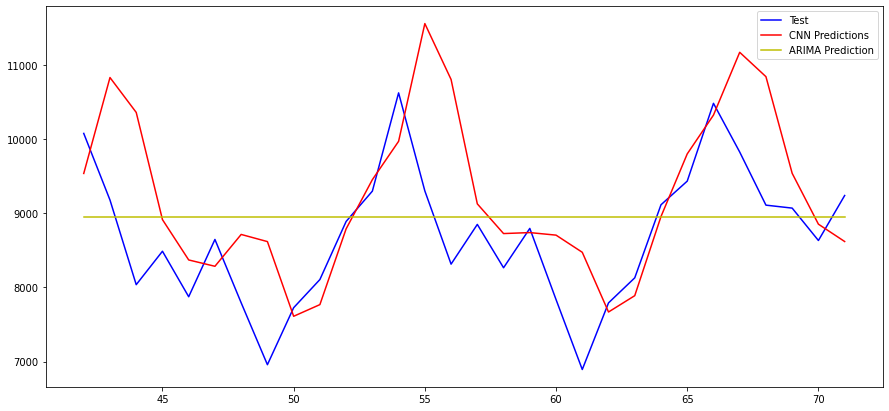

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(test['Y_test'], color='b')
plt.plot(pred['Y_pred'], color='r')
plt.plot(forecast, color='y')
plt.legend(['Test', 'CNN Predictions', 'ARIMA Prediction'], loc='best')
plt.show()

In [ ]:
info = pd.concat([arima, cnn], axis=0)
print(info)

   Model           MSE         MAE         RMSE       MAPE        R2
0  ARIMA  8.710987e+05  747.000000   933.326702   8.972409 -0.078723
0    CNN  1.125839e+06  772.787158  1061.055623  14.045432 -0.394180
